In [1]:
# Import matplotlib and setup the figures to display within the notebook
# %matplotlib inline : to see the plots inside the notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

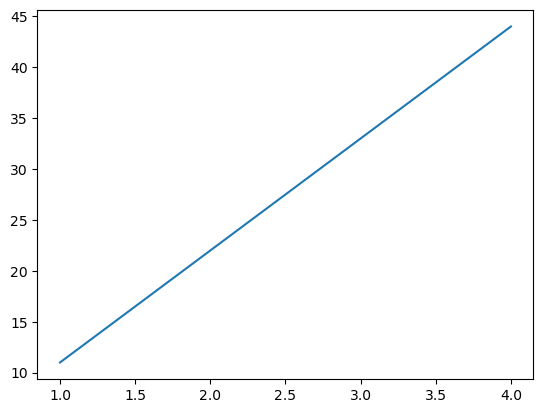

In [2]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
# PyPlot API - generally less flexible than Object-Oriented API
plt.plot(x, y);

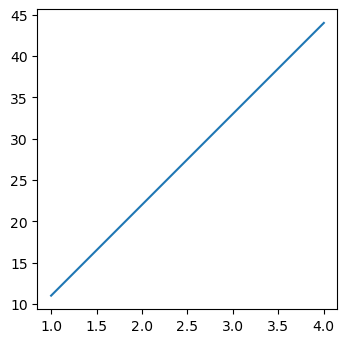

In [3]:
# Confusing #2
fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show();

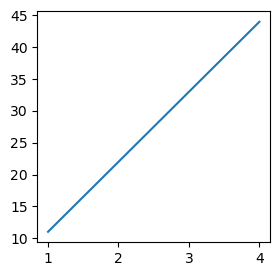

In [4]:
# Easier and more robust going forward (what we're going to use)
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(x, y);

## MatPlotLib Workflow

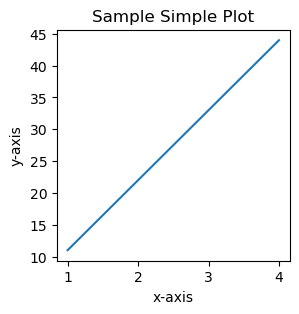

In [5]:
# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(3,3)) #(width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", 
       xlabel="x-axis", 
       ylabel="y-axis")

# 5. Save & show
fig.savefig("../Fotos/simple-plot-example.png")

## Scatter plot

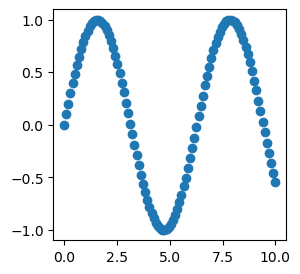

In [6]:
# Create an array
x = np.linspace(0, 10, 100)
# The default plot is line
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(x, np.sin(x));

## Bar plot

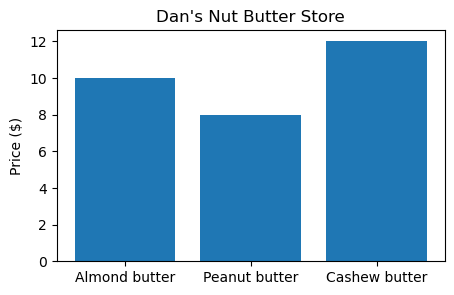

In [7]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

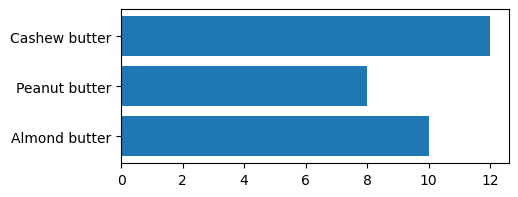

In [8]:
# horizontal bar
fig, ax = plt.subplots(figsize=(5,2))
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

## SubPlots

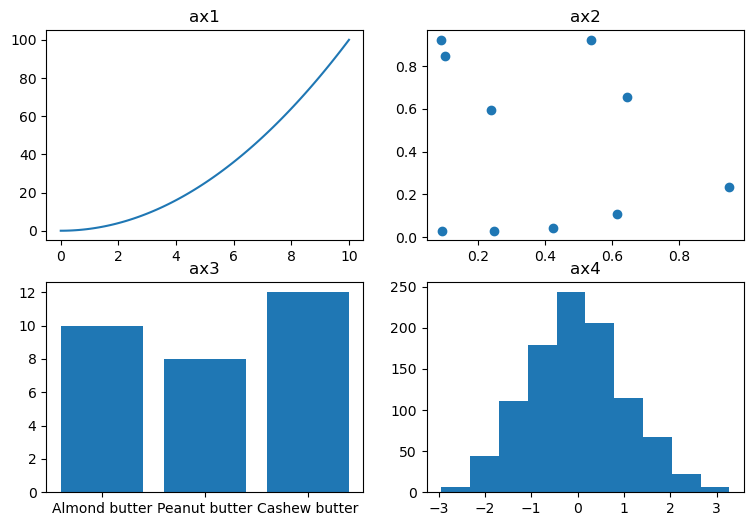

In [9]:
# Create an array
# x = np.linspace(0, 10, 100) # vector x

# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(9, 6))

# Plot data to each axis
ax1.plot(x, x**2);
ax1.set(title="ax1");
#
ax2.scatter(np.random.random(10), np.random.random(10));
ax2.set(title="ax2");
#
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax3.set(title="ax3");
#
ax4.hist(np.random.randn(1000));# random numbers in a normal distribution
ax4.set(title="ax4");

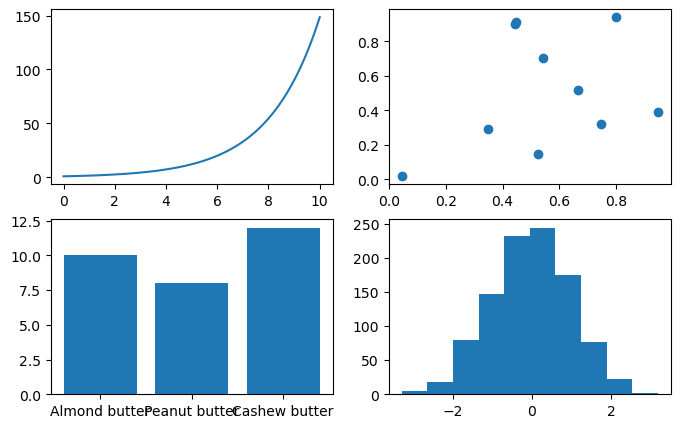

In [10]:
# Option 2: Create multiple subplots

# Create an array
# x = np.linspace(0, 10, 100) # vector x

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

# Index to plot data [rom, column]
ax[0, 0].plot(x, np.exp(x/2));
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Working with Pandas

In [11]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("../datos/car-sales.csv")
# Remove price column symbols
# tipo string:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2022", periods=len(car_sales))
# Make total sales column
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales
#
#
## forma clásica - reemplazando y guardando como float
# car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(float)
# quitándole dos ceros al dividir sobre 100 y dejando como int
# car_sales["Price"] = (car_sales["Price"]/100).astype(int)

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


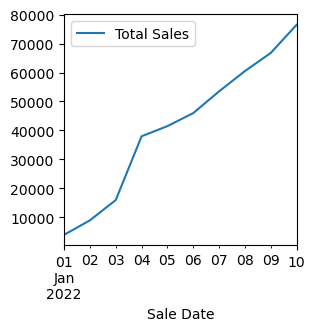

In [12]:
car_sales.plot(x='Sale Date', y='Total Sales', figsize=(3, 3));

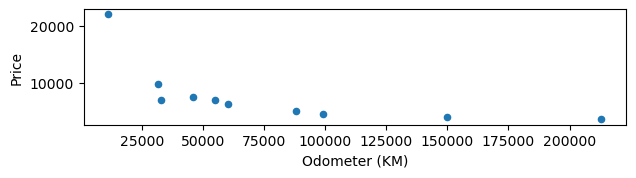

In [13]:
# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter', figsize=(7, 1.5));

## DataFrame Bar

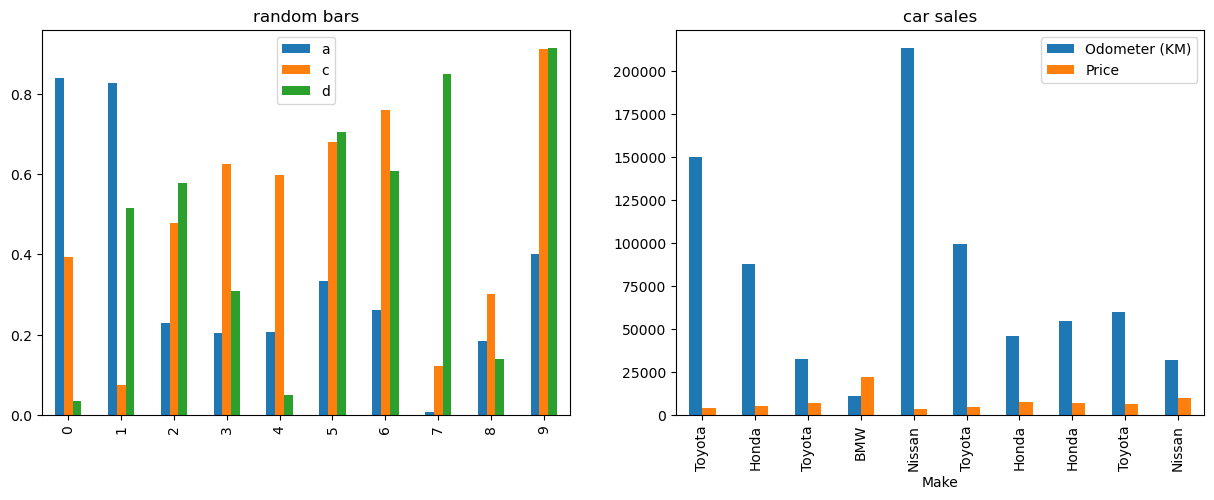

In [14]:
# matrix 10x4
x = np.random.rand(10, 4)
# asignamos la matrix a un dataFrame
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
# plot
# df.plot.bar();
# Can do the same thing with 'kind' keyword
# df.plot(kind='bar');
fig, ((ax1, ax2)) = plt.subplots(nrows=1, 
                                 ncols=2, 
                                 figsize=(15, 5))

df[["a", "c", "d"]].plot(ax=ax1, kind='bar') # CORRECTO funcional igual pero tenemos control de las columnas
# df.plot(ax=ax1, kind='bar') # CORRECTO
ax1.set(title="random bars");

# ax2.bar(car_sales["Make"], car_sales["Odometer (KM)"]); # ERRADO, no muestra sino las cuatro primeras filas, no sé por qué
# car_sales[["Odometer (KM)","Make"]].plot(ax=ax2, kind='bar') # ERRADO, muestra en eje x los índices pero no el Make
car_sales.plot(ax=ax2, x="Make", y=["Odometer (KM)", "Price"],  kind='bar') # CORRECTO
ax2.set(title="car sales");

# TODO ESTO LO HICE ANTES DE VER TODOS LOS VIDEOS, Y ACÁ BÁSICAMENTE ESTOY MEZCLANDO PYPLOT (O SEA .PLOT) 
# CON OO METHOD (O SEA AX1, AX2)
# MÁS ABAJO SE HACE CORRECTAMENTE

## DataFrame Histograms

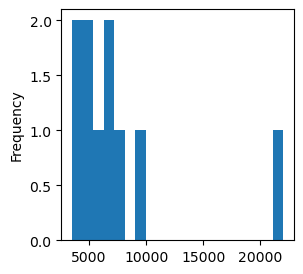

In [15]:
# car_sales["Odometer (KM)"].plot(kind="hist");
# car_sales["Price"].plot(kind="hist"); # alternativa a (kind="hist")
car_sales["Price"].plot.hist(bins=20, figsize=(3, 3)); # con hist() podemos definir el # de bins
# Width of each bin is = (max value of data – min value of data) / total number of bins

In [16]:
# Let's try with another dataset
heart_disease = pd.read_csv("../datos/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


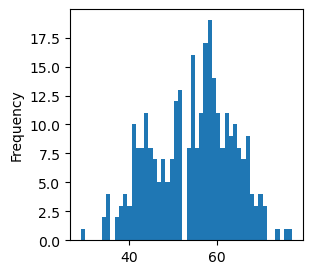

In [17]:
heart_disease["age"].plot.hist(bins=50, figsize=(3, 3));

## Pyplot: something simple - OO: more advanced

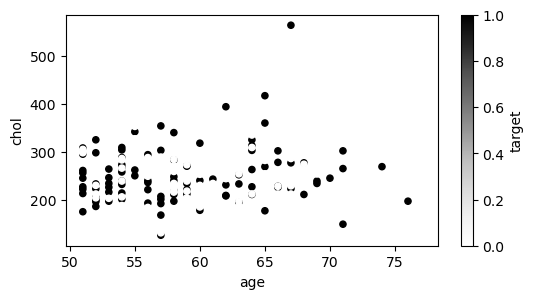

In [18]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]

#pyplot method: 
over_50.plot(x='age', y='chol', c='target', figsize=(6, 3), kind='scatter');

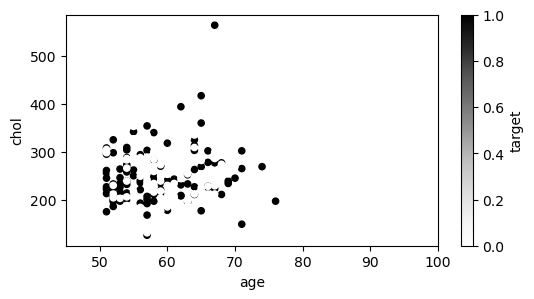

In [19]:
# OO-method:
# clave => ax: es el gráfico como tal, pueden haber más de uno, 
fig, ax = plt.subplots(figsize=(6, 3))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax); # parte clave, se define nuestro axis 
ax.set_xlim([45, 100]);

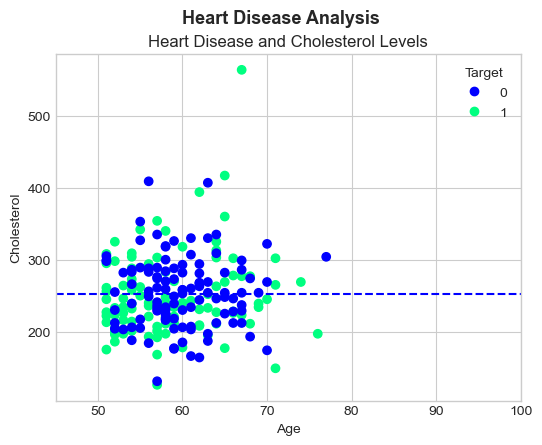

In [20]:
# OO method from scratch

# see the styles available
# plt.style.available

# define a style
plt.style.use('seaborn-whitegrid')

# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4.5))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"],
                     cmap="winter") # style of Target legend

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol",
       xlim=[45, 100]);

# Add legend to target column
ax.legend(*scatter.legend_elements(), title="Target", loc='upper right', fancybox=False);

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--",
           color='blue', # c='b' #alternativa
           label="Average"); 

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=13, fontweight='bold');

# Save the file
# fig.savefig("../datos/heart-disease-analysis.png")